In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
from matplotlib.animation import FuncAnimation

from Ps_library import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

Find parameters which do optimal cooling (32hbar k->28hbar k) for just 1 cycle .... then increase number of cycles to much higher numbers

In [3]:
system = Ps_system(N_atoms=250)
rabi0 = 2*np.pi*(300e-3)
chirp = 2*np.pi*(50e-3)
detuning = 2*np.pi*(300e-3)
direction = 1
pulse_duration = 10
# each cycle has 4 laser interactions
num_cycles = 10

# alternate red-red-blue-blue
for i in range(5,num_cycles):
    #print("direction: "+str(direction))
    #print("detuning: "+str(detuning))
    red_detuned_LR = {"label":"laser"+str(4*i),"order":i*4,"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : pulse_duration,"unit_wavevector":direction,"start":0,"end":int(3*pulse_duration),"notch":0}
    system.init_pulse(red_detuned_LR)
    red_detuned_RL = {"label":"laser"+str(4*i+1),"order":i*4+1,"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : pulse_duration,"unit_wavevector":-direction,"start":0,"end":int(3*pulse_duration),"notch":0}   
    system.init_pulse(red_detuned_RL)
    blue_detuned_LR = {"label":"laser"+str(4*i+2),"order":i*4+2,"rabi0" : rabi0, "detuning": -detuning,"chirp" : chirp,"pulse_duration" : pulse_duration,"unit_wavevector":direction,"start":0,"end":int(3*pulse_duration),"notch":0}   
    system.init_pulse(blue_detuned_LR)
    blue_detuned_RL = {"label":"laser"+str(4*i+3),"order":i*4+3,"rabi0" : rabi0, "detuning": -detuning,"chirp" : chirp,"pulse_duration" : pulse_duration,"unit_wavevector":-direction,"start":0,"end":int(3*pulse_duration),"notch":0}   
    system.init_pulse(blue_detuned_RL)   
        
system.init_pulse_cycle()
#system.init_MBdistribution()
#system.init_states_ground()
system.states = qt.qload("data/states_detuned/laser19.csv")
save_path = "data/states_detuned/"
system.evolve(save_path)

Simulating pulse number 20 ....
Done!
Simulating pulse number 21 ....
Done!
Simulating pulse number 22 ....
Done!
Simulating pulse number 23 ....
Done!
Simulating pulse number 24 ....
Done!
Simulating pulse number 25 ....
Done!
Simulating pulse number 26 ....
Done!
Simulating pulse number 27 ....
Done!
Simulating pulse number 28 ....
Done!
Simulating pulse number 29 ....
Done!
Simulating pulse number 30 ....
Done!
Simulating pulse number 31 ....
Done!
Simulating pulse number 32 ....
Done!
Simulating pulse number 33 ....
Done!
Simulating pulse number 34 ....
Done!
Simulating pulse number 35 ....
Done!
Simulating pulse number 36 ....
Done!
Simulating pulse number 37 ....
Done!
Simulating pulse number 38 ....


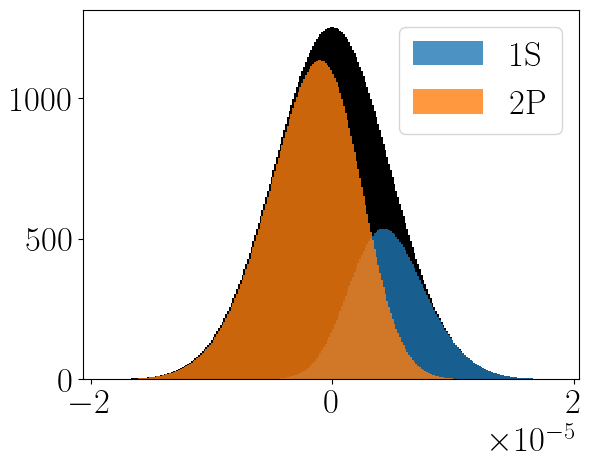

In [6]:
fig,ax = plt.subplots()
ax.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["1S"][0],color="black")
ax.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["2P"][0],color="black")
#ax_detuning = ax.twiny()
for key in system.expect:
    ax.hist(system.velocity_bins,system.velocity_bins,weights = system.expect[key][1],alpha=0.8,label=key)
    #ax_detuning.hist(system.detuning_bins,system.velocity_bins,weights = system.expect[key][1],alpha=0.8,label=key)
plt.legend()

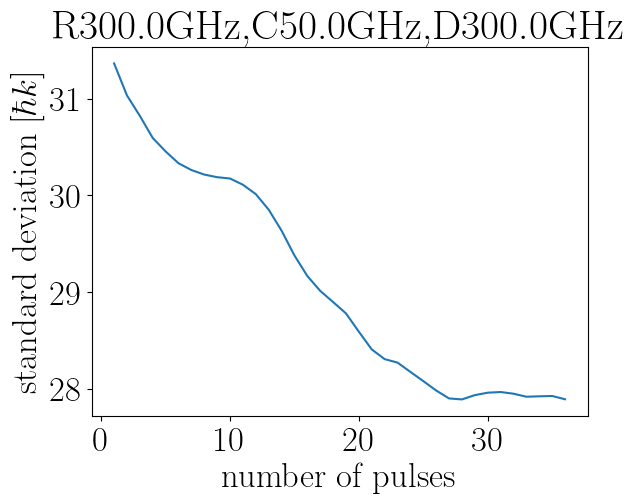

In [5]:
data_handler = handler()
#print(len(system.saved_states))
std = []
num_cycles = 9
rabi0 = 2*np.pi*(300e-3)
chirp = 2*np.pi*(50e-3)
detuning = 2*np.pi*(300e-3)
direction = 1
pulse_duration = 10
for i in range(4*num_cycles):
    #state = system.saved_states[i]
    state = data_handler.load_states_csv("data/states_detuned/laser{}.csv".format(i))
    std.append(data_handler.expect_standard_deviation(state,250))
plt.title("R{:0}GHz,C{:0}GHz,D{:0}GHz".format(rabi0/(2*np.pi)*1e3,chirp/(2*np.pi)*1e3,detuning*1e3/(2*np.pi)))
plt.plot(np.arange(1,4*num_cycles+1),std)
plt.xlabel("number of pulses")
plt.ylabel(r"standard deviation [$\hbar k$]")
plt.savefig("figures/jan_2023/cooling_detuned.jpg",bbox_inches="tight")
plt.show()

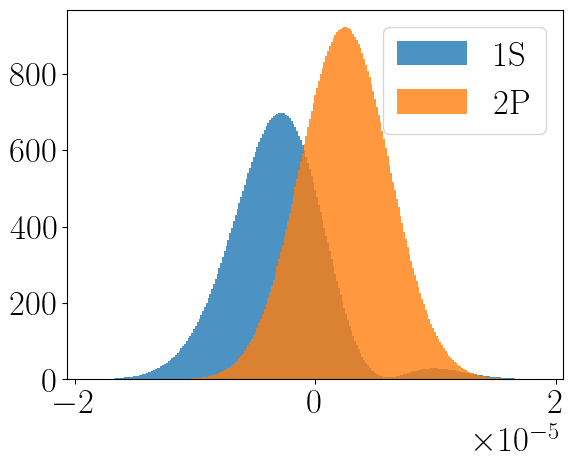

In [125]:
# Try again to plot the states with histograms. Might look nice
for key in system.expect:
    plt.hist(system.velocity_bins,system.velocity_bins,weights = system.expect[key][1],alpha=0.8,label=key)
    
plt.legend()

plt.show()

In [ ]:

# NOT WORKING :/
#Try making an animation out these histograms
"""
#n, _ = np.histogram(system.velocity_bins,system.velocity_bins,weights = system.expect["1S"][1])
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        system.expect[key][frame_number]
        n, _ = np.histogram(data, system.velocity_bins)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

fig, ax = plt.subplots()
_,_,bar_container = ax.hist(system.expect["1S"][0],system.velocity_bins)
ax.set_ylim(top=1200)
ani = FuncAnimation(fig, prepare_animation(bar_container), frames=np.arange(num_pulses))
plt.show()
"""

In [38]:
A = qt.tensor(qt.num(3,offset=1),qt.num(5,offset=1))
#print(A)
print(A.ptrace(0))


Quantum object: dims = [[3, 5], [3, 5]], shape = (15, 15), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  0.]
 [ 0.  0.  0.  0.  0

Make a grid for optimizing laser parameters. Plot either the cooling efficiency after each cycle, OR plot how good the desymmetrization is with some predefined metric

start with: excited_left_final/excited_left_initial - excited_right_final/excited_right_initial 